In [5]:
%matplotlib inline

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from scipy.misc import imread, imsave, imresize


In [7]:
%run traffic_util.py

In [8]:
X_train, y_train, X_test, y_test = traffic_load("../../../data")

In [5]:
info_test =  np.load('../../../data/X_test_videos.npy')
info_train = np.load('../../../data/X_train_videos.npy')

In [6]:
img_list = X_train[info_train == 0]
print len(img_list)


10


In [7]:
img_list_gray = map(lambda x : cv2.cvtColor(x,cv2.COLOR_BGR2GRAY), img_list)

In [9]:
print type(img_list_gray)

<type 'list'>


In [8]:
corners = map(lambda x : np.int0(cv2.goodFeaturesToTrack(x,100,0.01,10)), img_list_gray)
# We have up to 100 corners per image here (every corner - location in image)

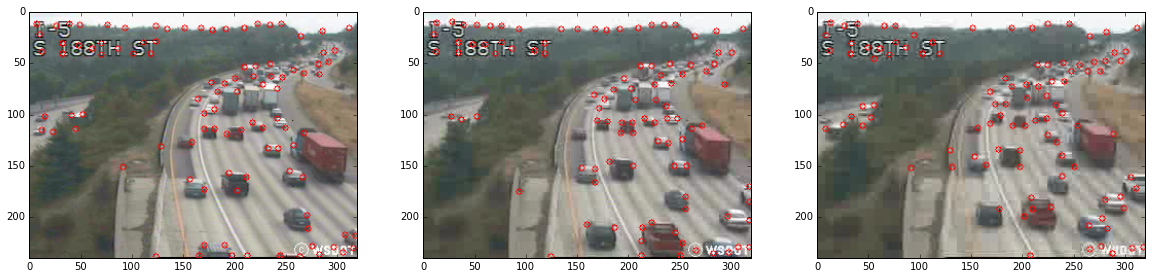

In [100]:
#Draw corners as cirles

plt.figure(figsize = (20,20))

for i in corners[0]:
    x,y = i.ravel()
    cv2.circle(img_list[0],(x,y),3, (255,0,0))   
plt.subplot(1, 3, 1)
plt.imshow(img_list[0])

for i in corners[1]:
    x,y = i.ravel()
    cv2.circle(img_list[1],(x,y),3, (255,0,0))
plt.subplot(1, 3, 2)
plt.imshow(img_list[1])

for i in corners[2]:
    x,y = i.ravel()
    cv2.circle(img_list[2],(x,y),3, (255,0,0))
plt.subplot(1, 3, 3)
plt.imshow(img_list[2])

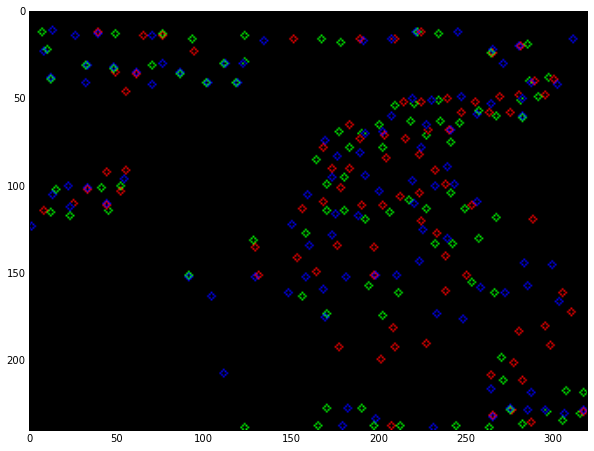

In [101]:
# Here we draw corners from 3 images on one plane
indx = [0,2,4]

img = np.zeros_like(img_list[0])

plt.figure(figsize = (10,10))

for i in corners[indx[0]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (0,255,0))

for i in corners[indx[1]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (255,0,0))    
    
for i in corners[indx[2]]:
    x,y = i.ravel()
    cv2.circle(img,(x,y),2, (0,0,255))    
plt.imshow(img)

In [102]:
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).sum(-1).sum(1)

In [103]:
def corners_bin(corn, bin_sizes):
    corn = corn[:,0,:]
    st_feat = np.zeros_like(img_list_gray[0])
    for i in corn:
        st_feat[i[1],i[0]] = 1
    bins = rebin(st_feat, bin_sizes)    
    return bins.astype(int)    

In [104]:
print corners_bin(corners[0], (12,16))
print np.sum(corners_bin(corners[0], (12,16)))

[[1 2 1 1 1 0 2 1 2 1 1 2 1 0 1 1]
 [2 1 1 2 1 1 1 0 0 0 0 0 0 1 1 0]
 [0 1 0 1 0 2 0 0 0 0 1 2 1 0 3 0]
 [0 0 0 0 0 0 0 0 1 2 3 2 2 1 1 0]
 [0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0]
 [2 1 3 0 0 0 0 0 1 2 2 1 2 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 2 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 2 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 0 0 0 0 0 1 0 2 2 1 0 1 2 2 2]]
100


In [105]:
np.abs(corners_bin(corners[0], (12,16)) - corners_bin(corners[1], (12,16)))

array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0],
       [2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0]])

In [71]:

files_for_bgs = np.random.choice(10000, 35)
len(files_for_bgs)
files = X_train[files_for_bgs]

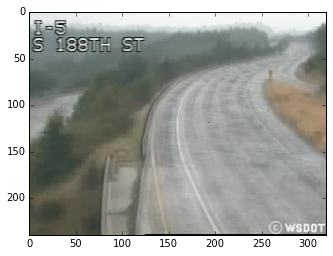

In [72]:
#BGS:
avr = (np.mean(files, axis = 0)).astype(np.uint8)
plt.imshow(avr)


In [73]:
avr_gray = cv2.cvtColor(avr,cv2.COLOR_BGR2GRAY)

In [76]:
avr_corners = np.int0(cv2.goodFeaturesToTrack(avr_gray,30,0.01,10))

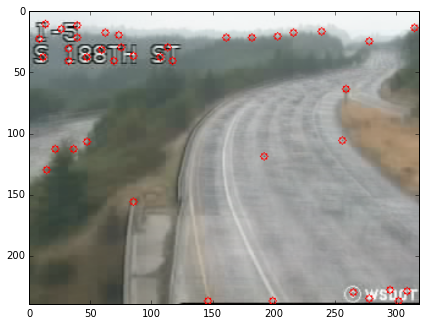

In [77]:
plt.figure(figsize = (7,7))

for i in avr_corners:
    x,y = i.ravel()
    cv2.circle(avr,(x,y),3, (255,0,0))   
plt.imshow(avr)

In [66]:
print corners_bin(avr_corners, (12,16))

NameError: name 'corners_bin' is not defined

In [48]:
# try apply mask:
action_corners = np.abs(corners_bin(corners[1], (12,16)) - corners_bin(avr_corners, (12,16)))
print action_corners
print action_corners.shape

NameError: name 'corners_bin' is not defined